In [1]:
from pythetatools.config import *
from pythetatools.config_visualisation import *
from pythetatools.config_samples import sample_to_title, sample_to_nuflav
from pythetatools.base_visualisation import *
from pythetatools.file_manager import read_histogram
import pythetatools.toyxp as toyxp

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import uproot
import matplotlib.colors as colors

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.28/04


In [2]:
dir_ver = 'OA2023'
base_dir = f"{inputs_dir}/{dir_ver}/ErrorBands"

outdir_path = f'{outputs_dir}/plots/{dir_ver}/ErrorBars/'
os.makedirs(outdir_path, exist_ok=True)

__Here you need to set the input directories where your error bands are stored__

In [3]:

error_band_color = [darkblue, "#E73121"]
error_band_hatch = [ "\\\\",  '///']
labels = ["Pre-ND", 'Post-ND']
flavour_to_xmax_errorbands = {'nue':1.3, 'numu':2.99}

indir_prebanff = f"{base_dir}/ErrorBands_AsimovOA2023BFNO_Ptheta_Matrix_preBanff_v19_SKJointErrorMatrix_OA2023_V1_mom_Run11_Mirrorfixed" 
indir_postbanff = f"{base_dir}/ErrorBands_AsimovOA2023BFNO_Ptheta_Matrix_postBanff_v19_SKJointErrorMatrix_OA2023_V1_mom_Run11_Mirrorfixed" 
indir_postbanff_SKoa2021 = f"{base_dir}/ErrorBands_AsimovOA2023BFNO_Ptheta_Matrix_postBanff_v19_SKJointErrorMatrix_OA2021_V1_mom_Run11_Mirrorfixed"


In [4]:

def PlotErrorBands(indir_1, indir_2, labels, group='all', nfiles = 100):

    sample_titles = ['numu1R', 'nue1R', 'numubar1R', 'nuebar1R', 'nue1RD', 'numucc1pi']
    asimov_dummy = toyxp.load(f"{indir_1}/ErrorBands_00.root", kind='asimov', sample_titles=sample_titles)
    
    for sample_title in asimov_dummy.sample_titles:
        fig, ax = plt.subplots(figsize=(8, 6))
        
        z_mean = np.zeros(len(asimov_dummy[sample_title].z))
        errors_mean = np.zeros(len(asimov_dummy[sample_title].z))
        for i in range(nfiles):
            x_edges, z, errors = read_histogram(f"{indir_1}/ErrorBands_{i:02d}.root", f'h{sample_title}_errorbands_{group}', dim=1)
            z_mean += z
            errors_mean += errors  
        z_mean = z_mean/nfiles
        errors_mean = errors_mean/nfiles
        
        sample_1 = toyxp.Sample([x_edges], z_mean, title=sample_title, analysis_type='Erec')
        sample_1_m = sample_1 - errors
        sample_1_p = sample_1 + errors
        
        z_mean = np.zeros(len(asimov_dummy[sample_title].z))
        errors_mean = np.zeros(len(asimov_dummy[sample_title].z))
        for i in range(nfiles):
            x_edges, z, errors = read_histogram(f"{indir_2}/ErrorBands_{i:02d}.root", f'h{sample_title}_errorbands_{group}', dim=1)
            z_mean += z
            errors_mean += errors 
        z_mean = z_mean/nfiles
        errors_mean = errors_mean/nfiles
        
        sample_2= toyxp.Sample([x_edges], z_mean, title=sample_title, analysis_type='Erec')
        sample_2_m = sample_2 - errors_mean
        sample_2_p = sample_2 + errors_mean

        sample_2.plot(ax, color='none') # to set the axis labels
        error_bars = [[sample_1_m, sample_1_p], [sample_2_m, sample_2_p]]
        
        handles = []
        for k in range(2):
            sample_m, sample_p = error_bars[k]
            bin_edges = sample_m.bin_edges[0]
            for i in range(len(sample_m.z)):
                x_left = bin_edges[i]
                width = bin_edges[i + 1] - bin_edges[i]
                
                y_min = min(sample_m.z[i], sample_p.z[i])
                y_max = max(sample_m.z[i], sample_p.z[i])
                height = y_max - y_min
                
                rect = patches.Rectangle((x_left, y_min), width, height, edgecolor=error_band_color[k],
                                         hatch=error_band_hatch[k], facecolor='none', linewidth=1)
                ax.add_patch(rect)
                ax.scatter(x_left+width/2, y_min+height/2, color=error_band_color[k], marker='s', s=3)
                
            handles.append(patches.Patch(edgecolor=error_band_color[k],
                                         hatch=error_band_hatch[k], facecolor='none', label=labels[k]))
            
            ax.set_title(sample_to_title[sample_title], loc='left')
            ax.set_title(tag, loc='right')
            
            ax.set_xlim(0.001, flavour_to_xmax_errorbands[sample_to_nuflav[sample_title]])
        show_minor_ticks(ax)
        fig.set_size_inches(8, 6)
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(0, ymax * 1.5)
        ax.legend(handles=handles, loc='best')
        
        fig.savefig(f'{outputs_dir}/plots/{dir_ver}/ErrorBars/ErrorBars_{sample_title}_{labels[0]}_vs_{labels[1]}.pdf', bbox_inches='tight')
        fig.savefig(f'{outputs_dir}/plots/{dir_ver}/ErrorBars/ErrorBars_{sample_title}_{labels[0]}_vs_{labels[1]}.png', bbox_inches='tight', dpi=300)
        fig.savefig(f'{outputs_dir}/plots/{dir_ver}/ErrorBars/ErrorBars_{sample_title}_{labels[0]}_vs_{labels[1]}.svg', bbox_inches='tight')
        fig.savefig(f'{outputs_dir}/plots/{dir_ver}/ErrorBars/ErrorBars_{sample_title}_{labels[0]}_vs_{labels[1]}.eps', bbox_inches='tight')
        fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.3)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


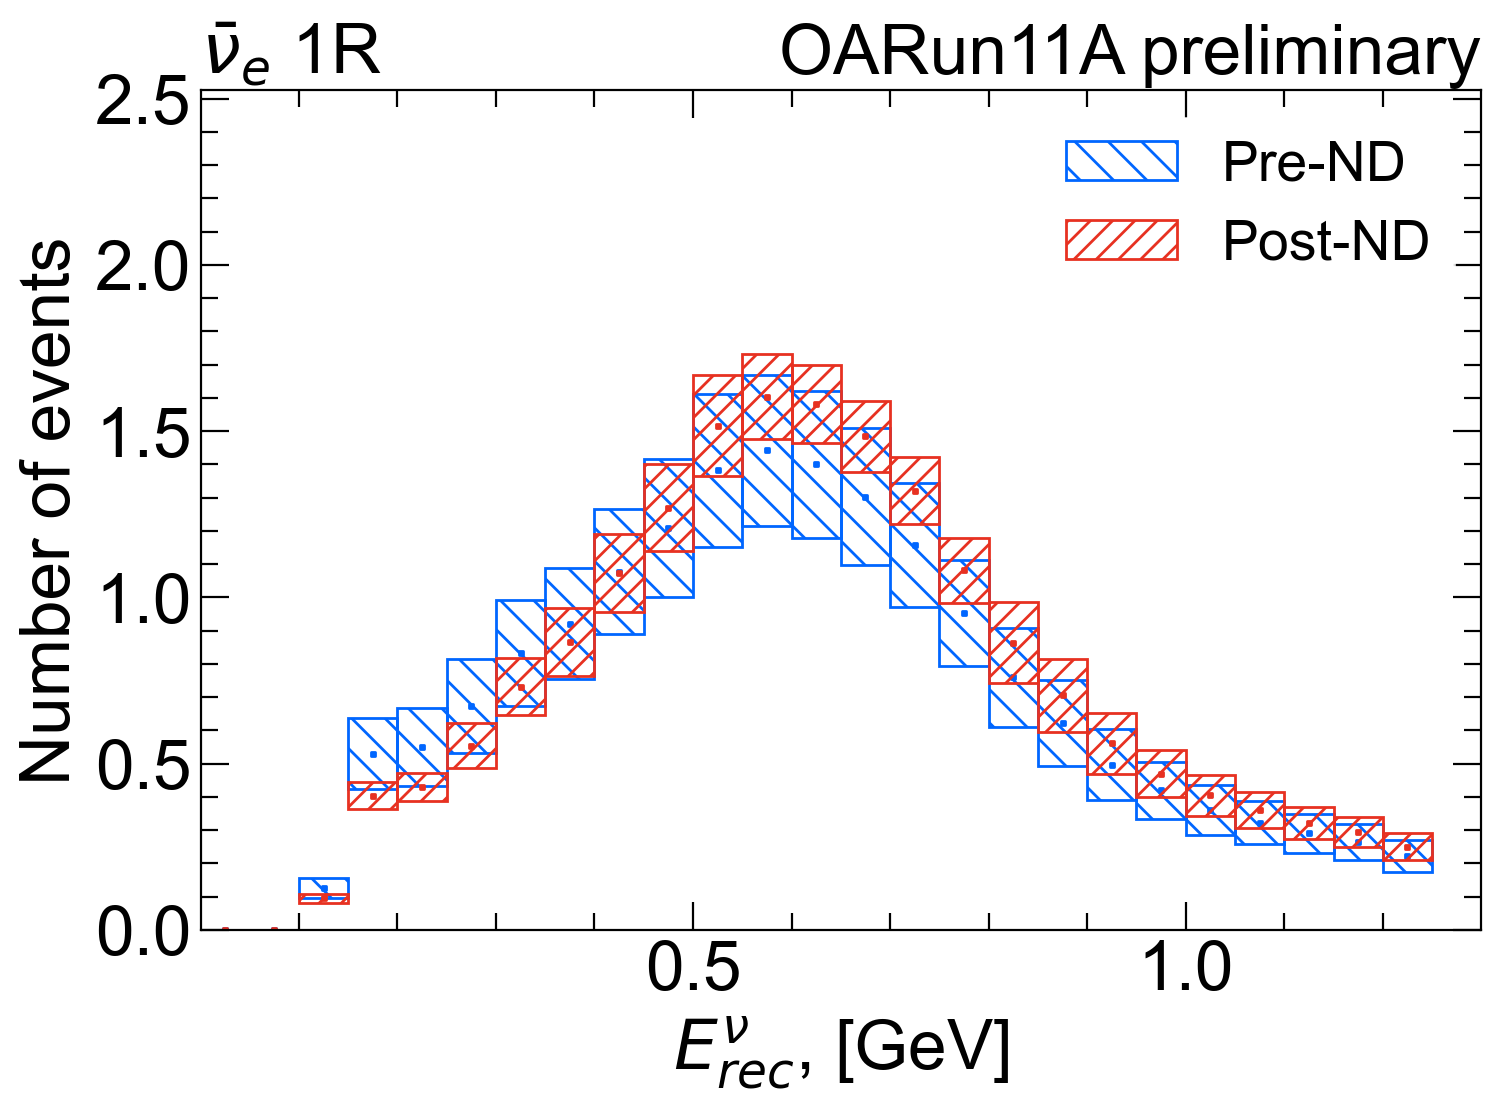

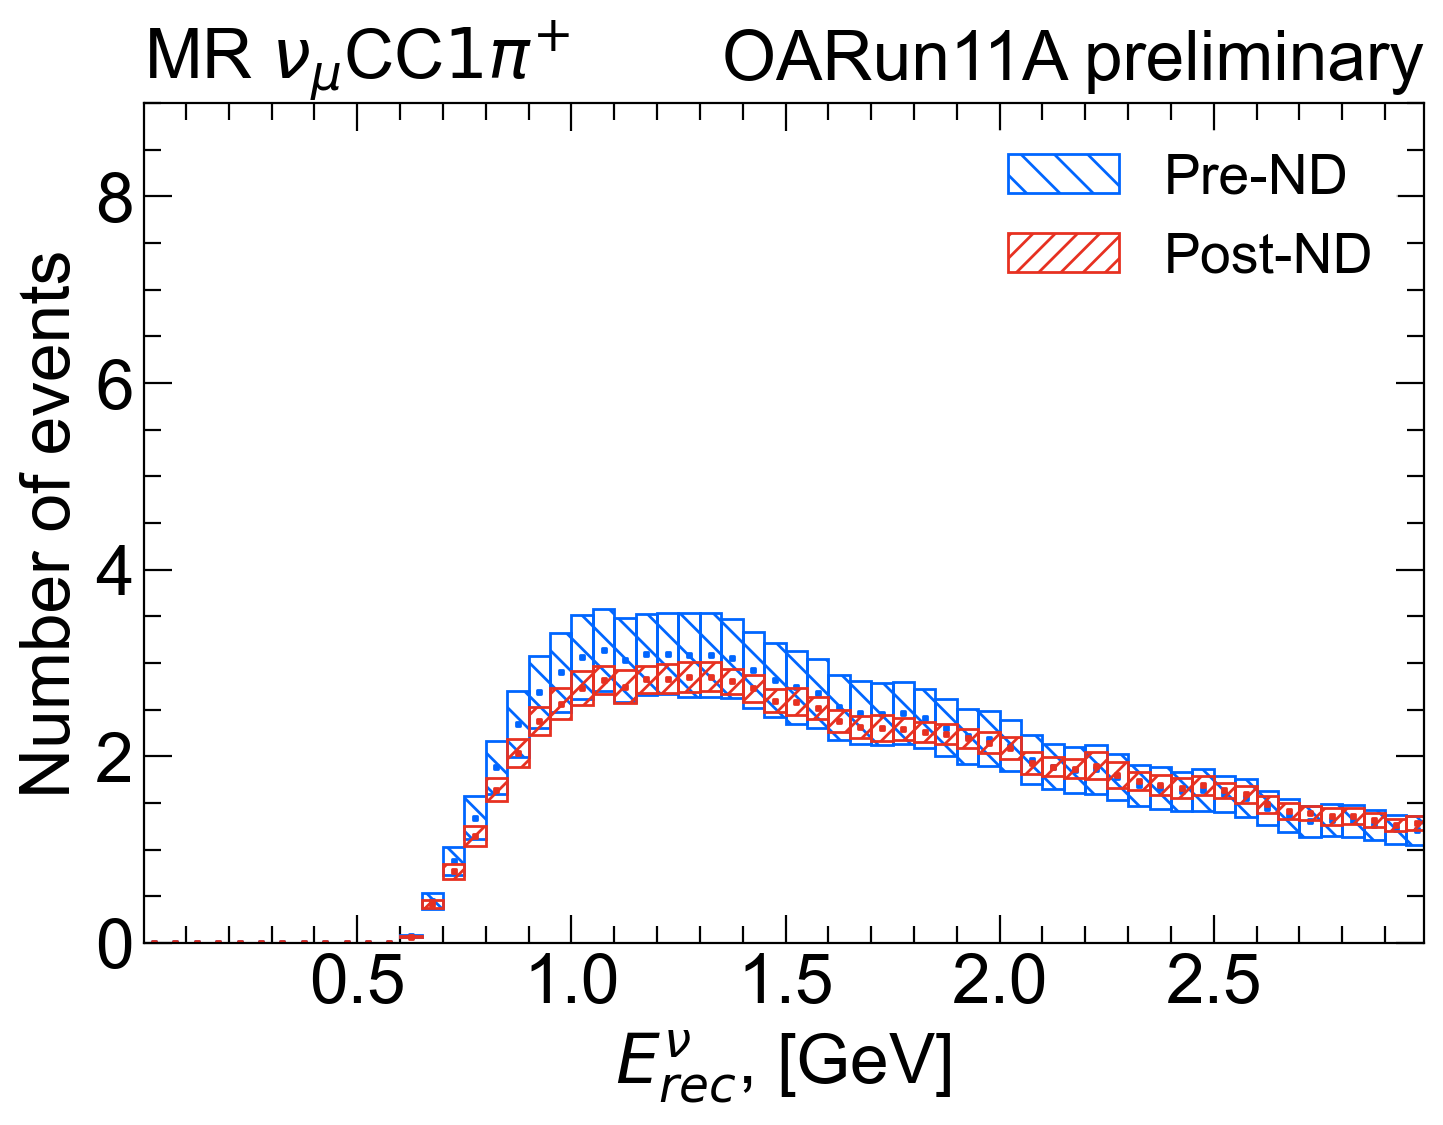

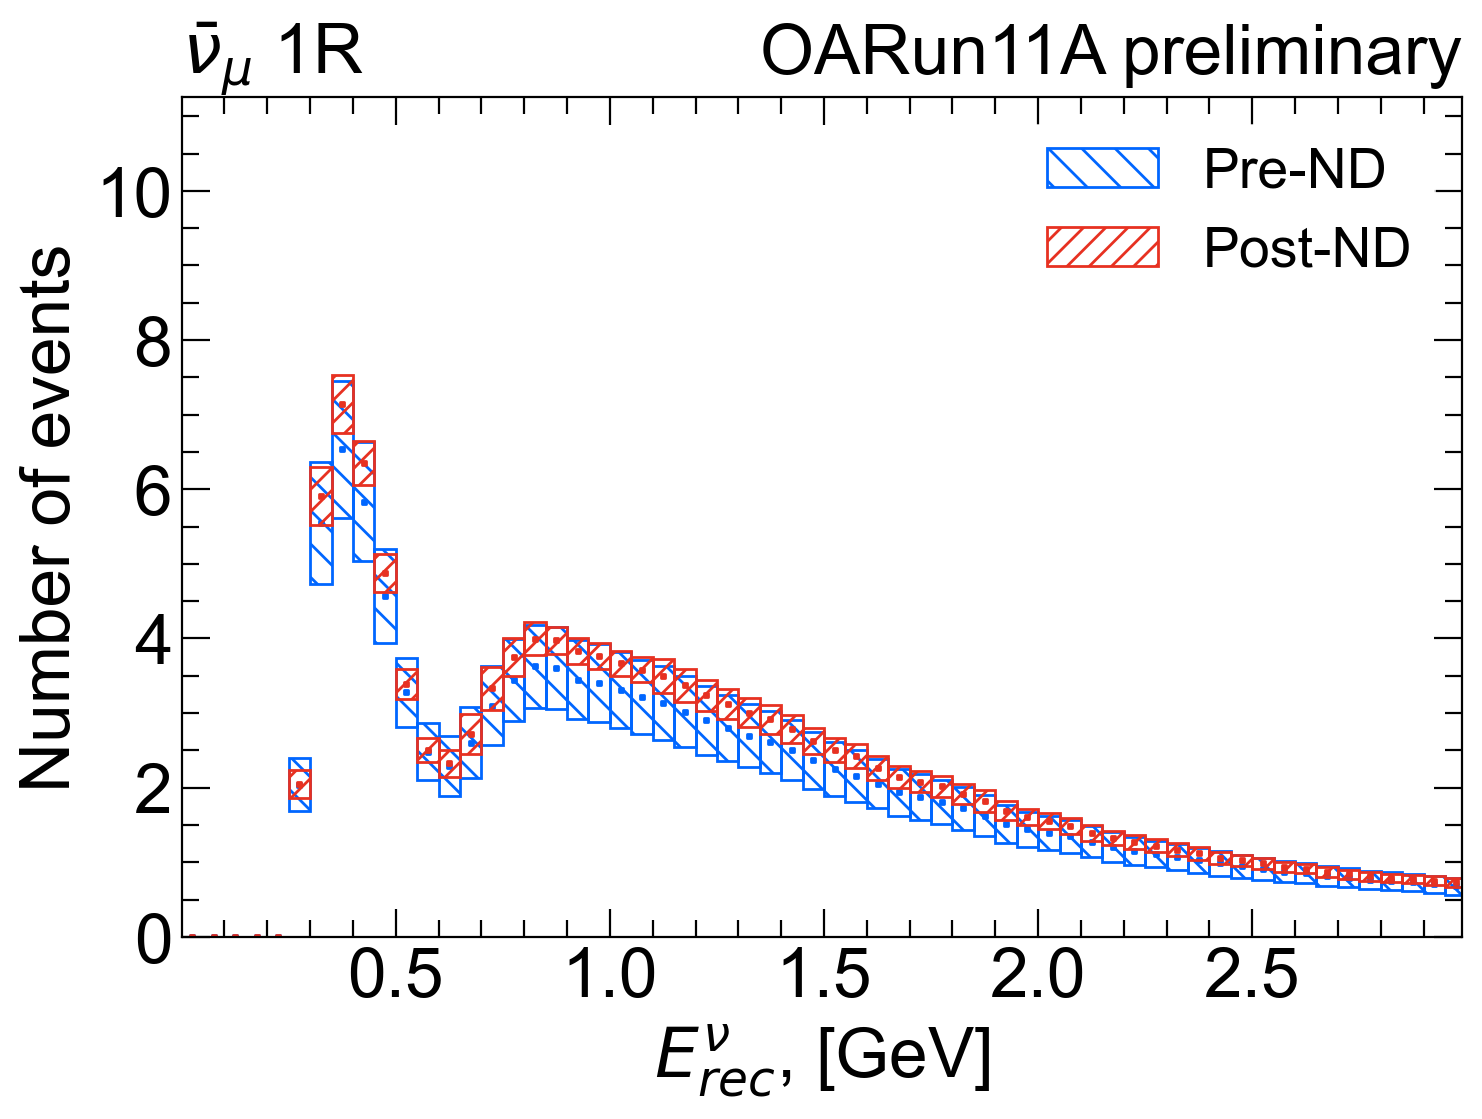

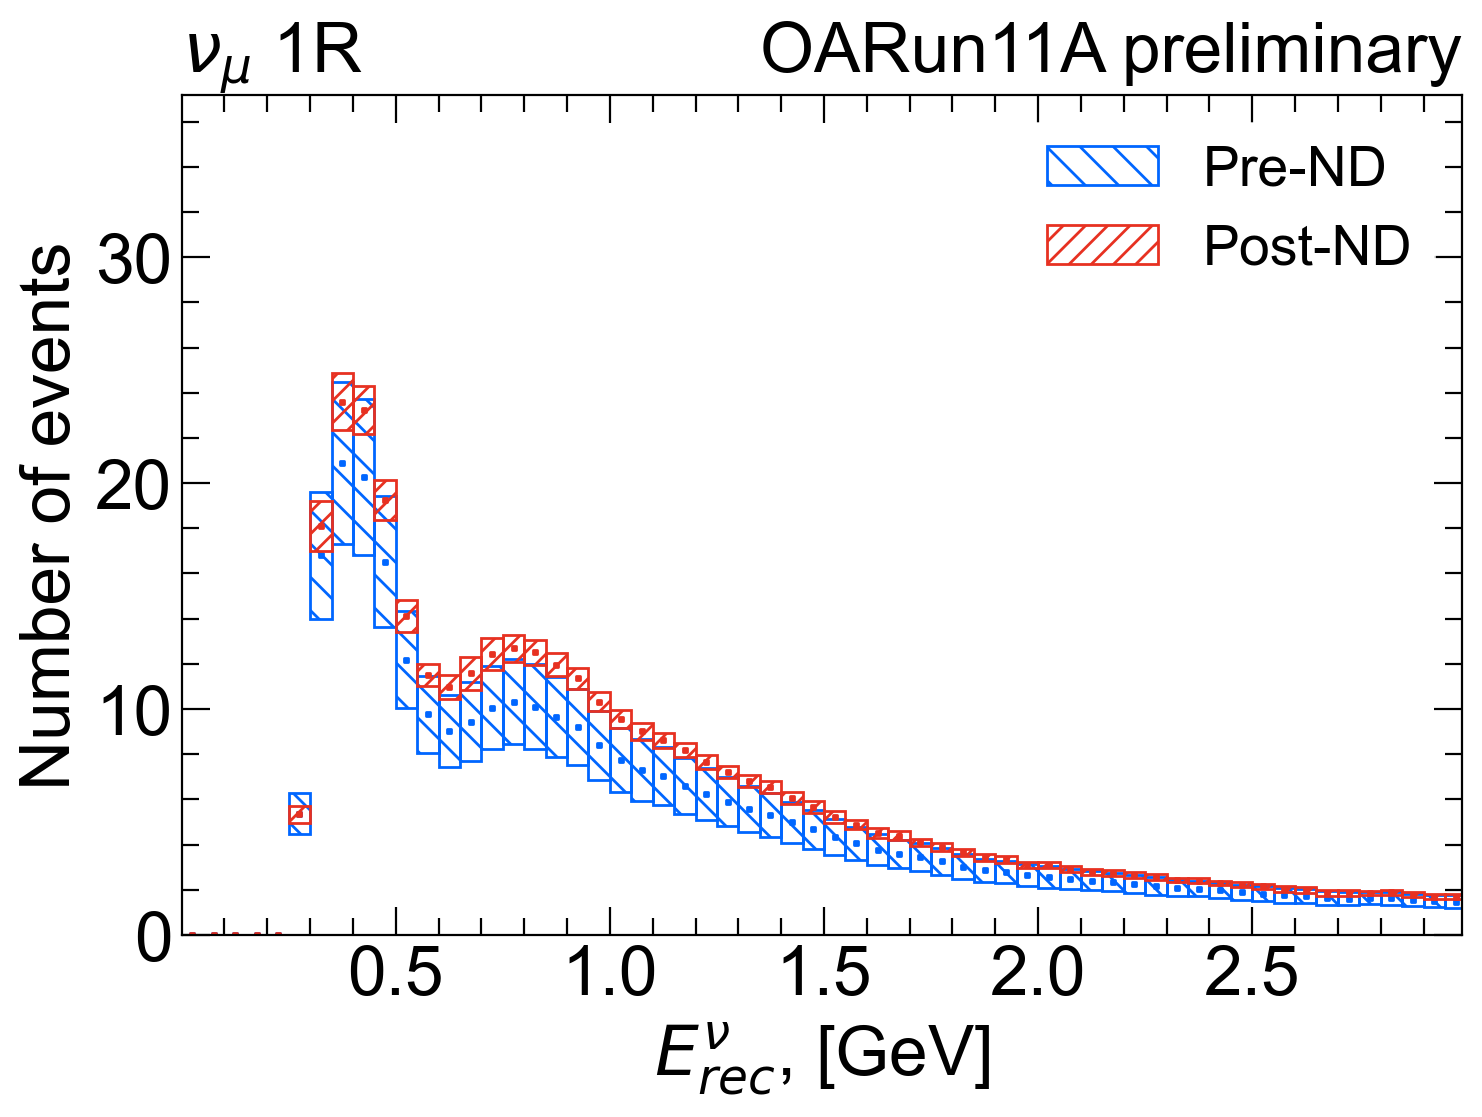

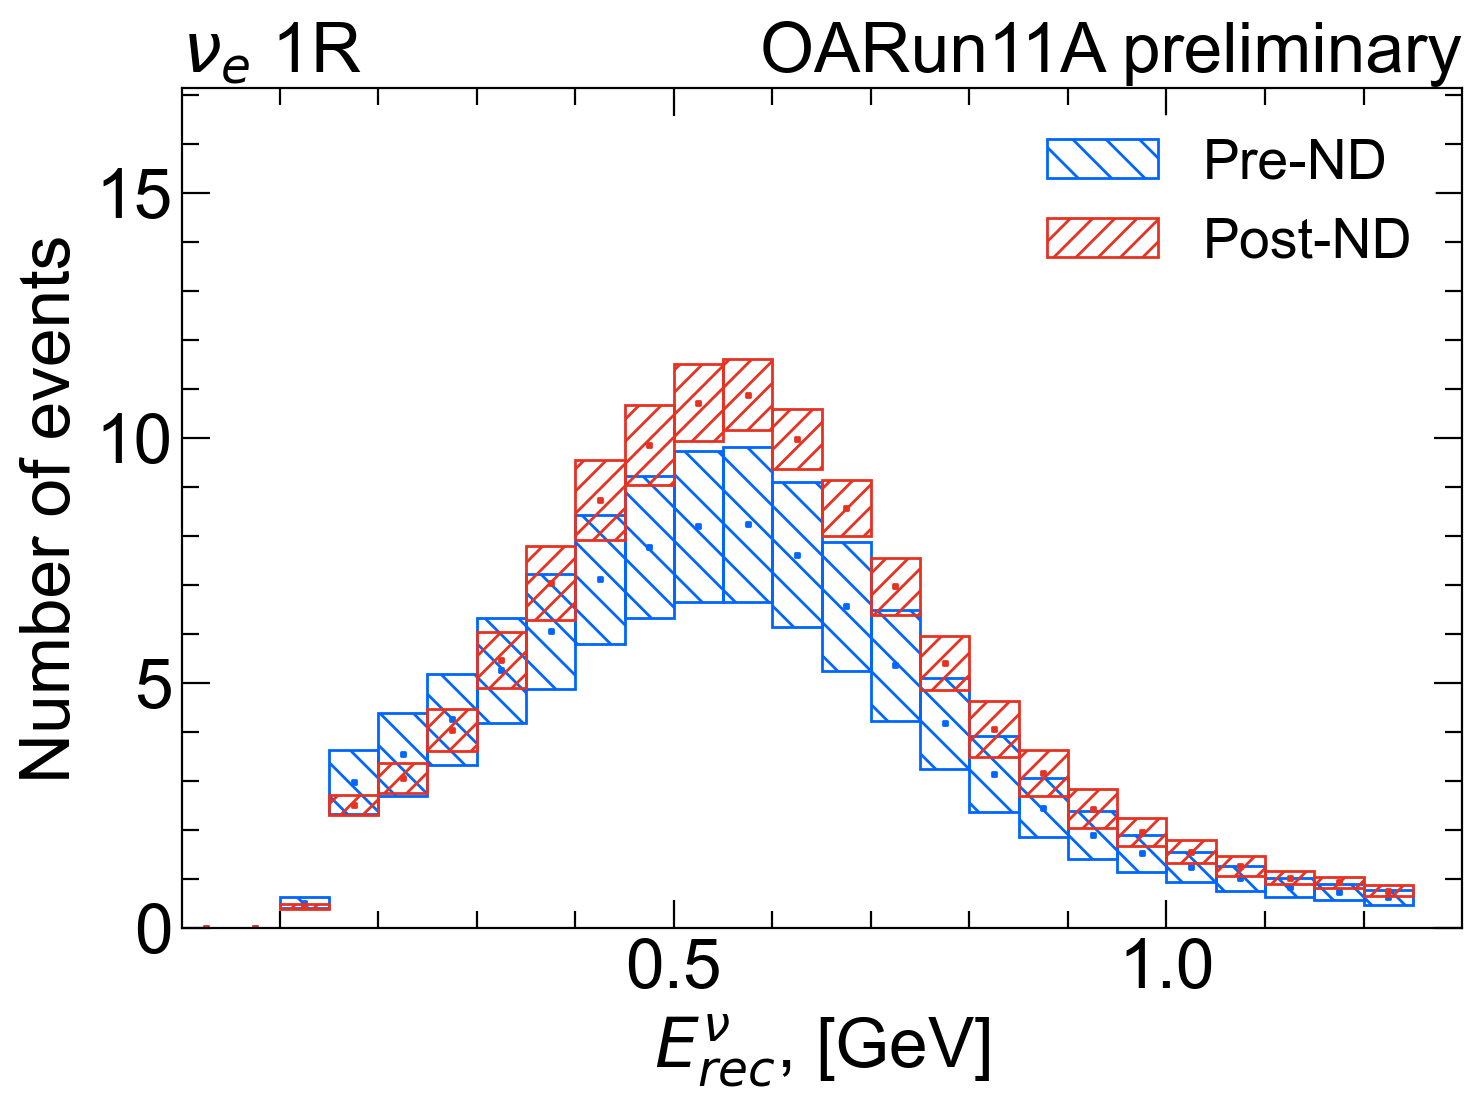

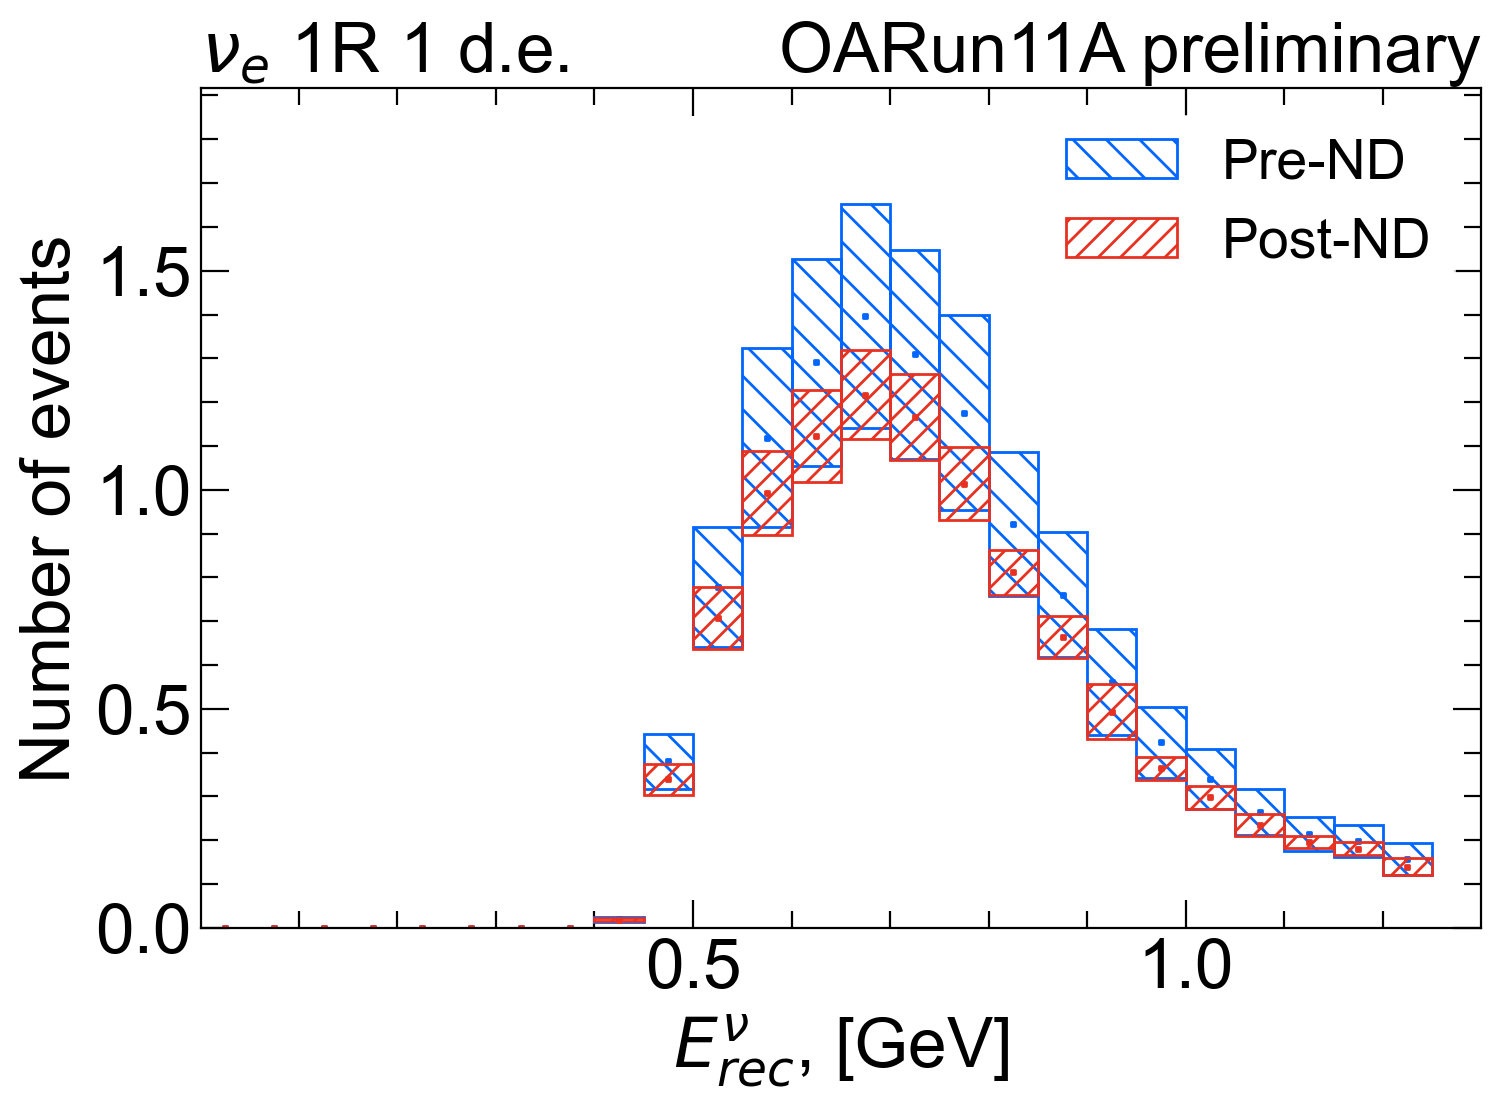

In [5]:
indir_1 = indir_prebanff
indir_2 = indir_postbanff
labels = ['Pre-ND', 'Post-ND']

PlotErrorBands(indir_1, indir_2, labels, nfiles = 100)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


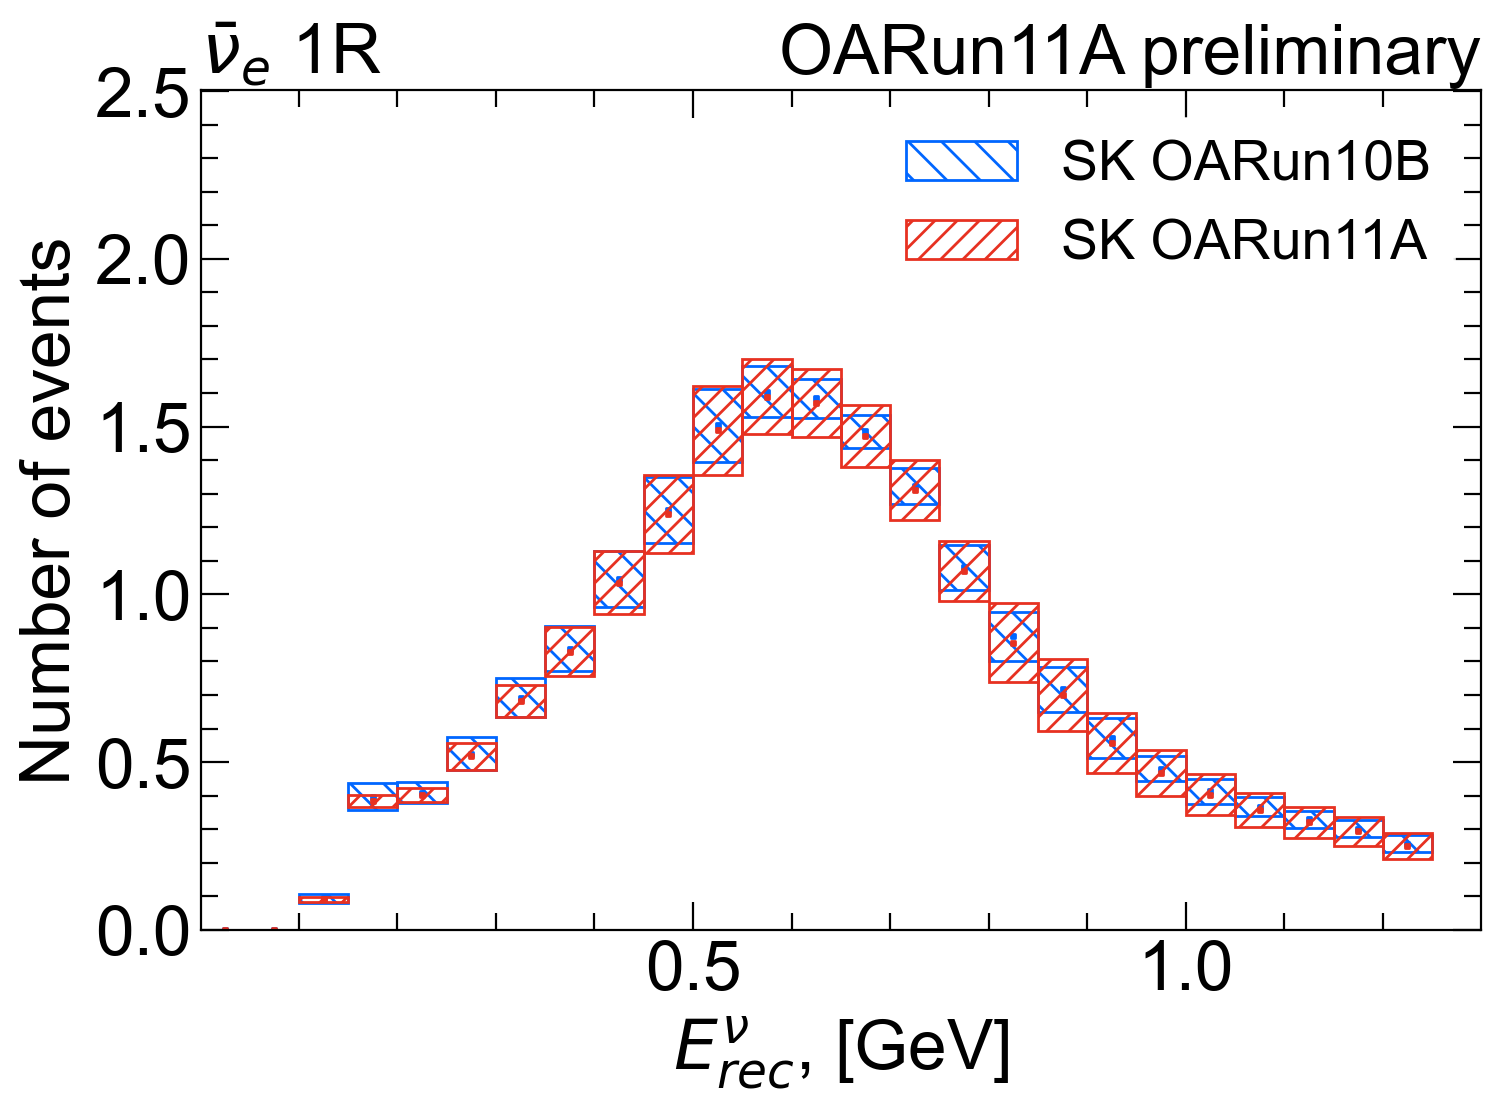

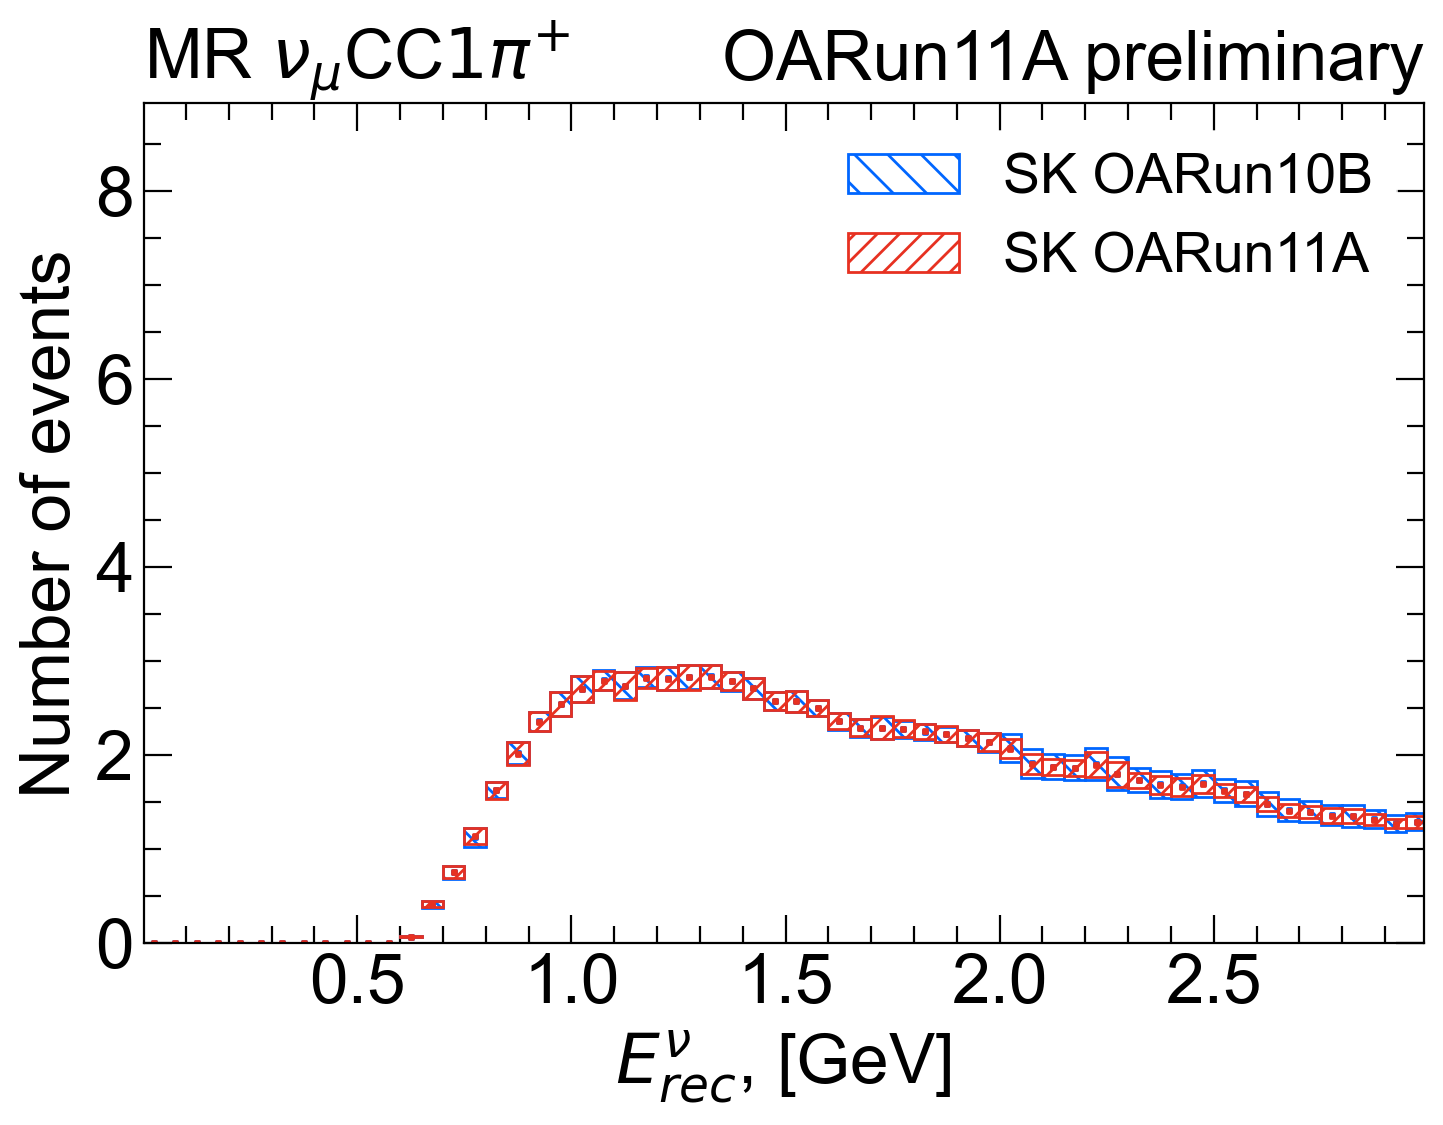

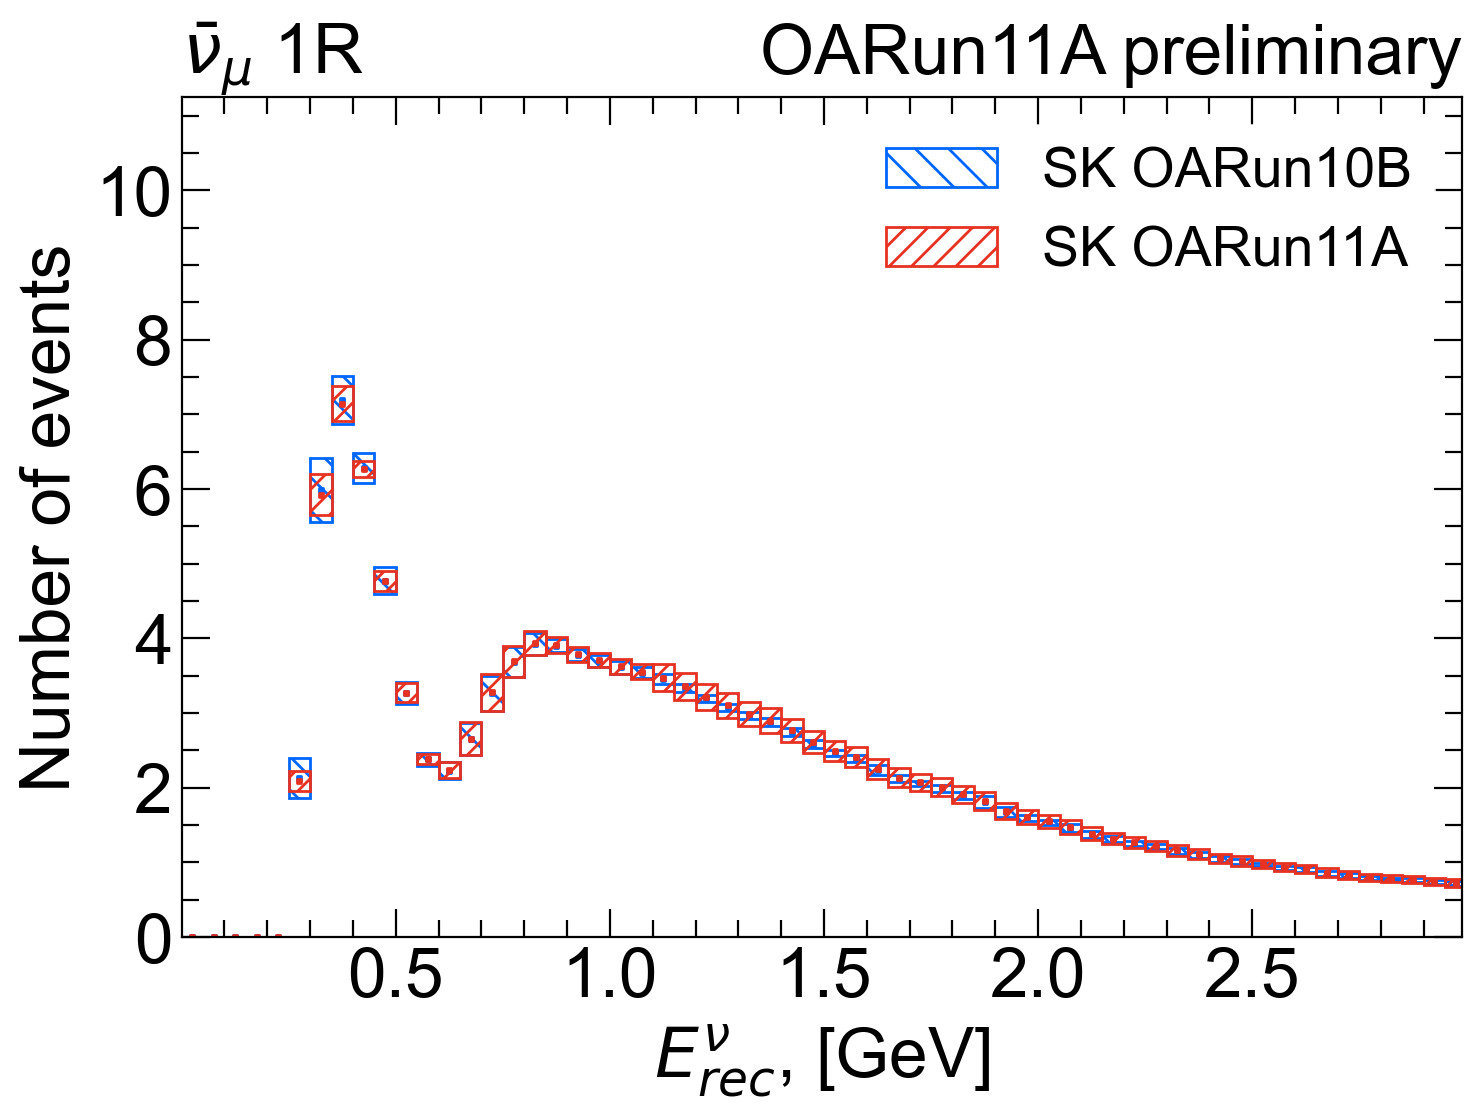

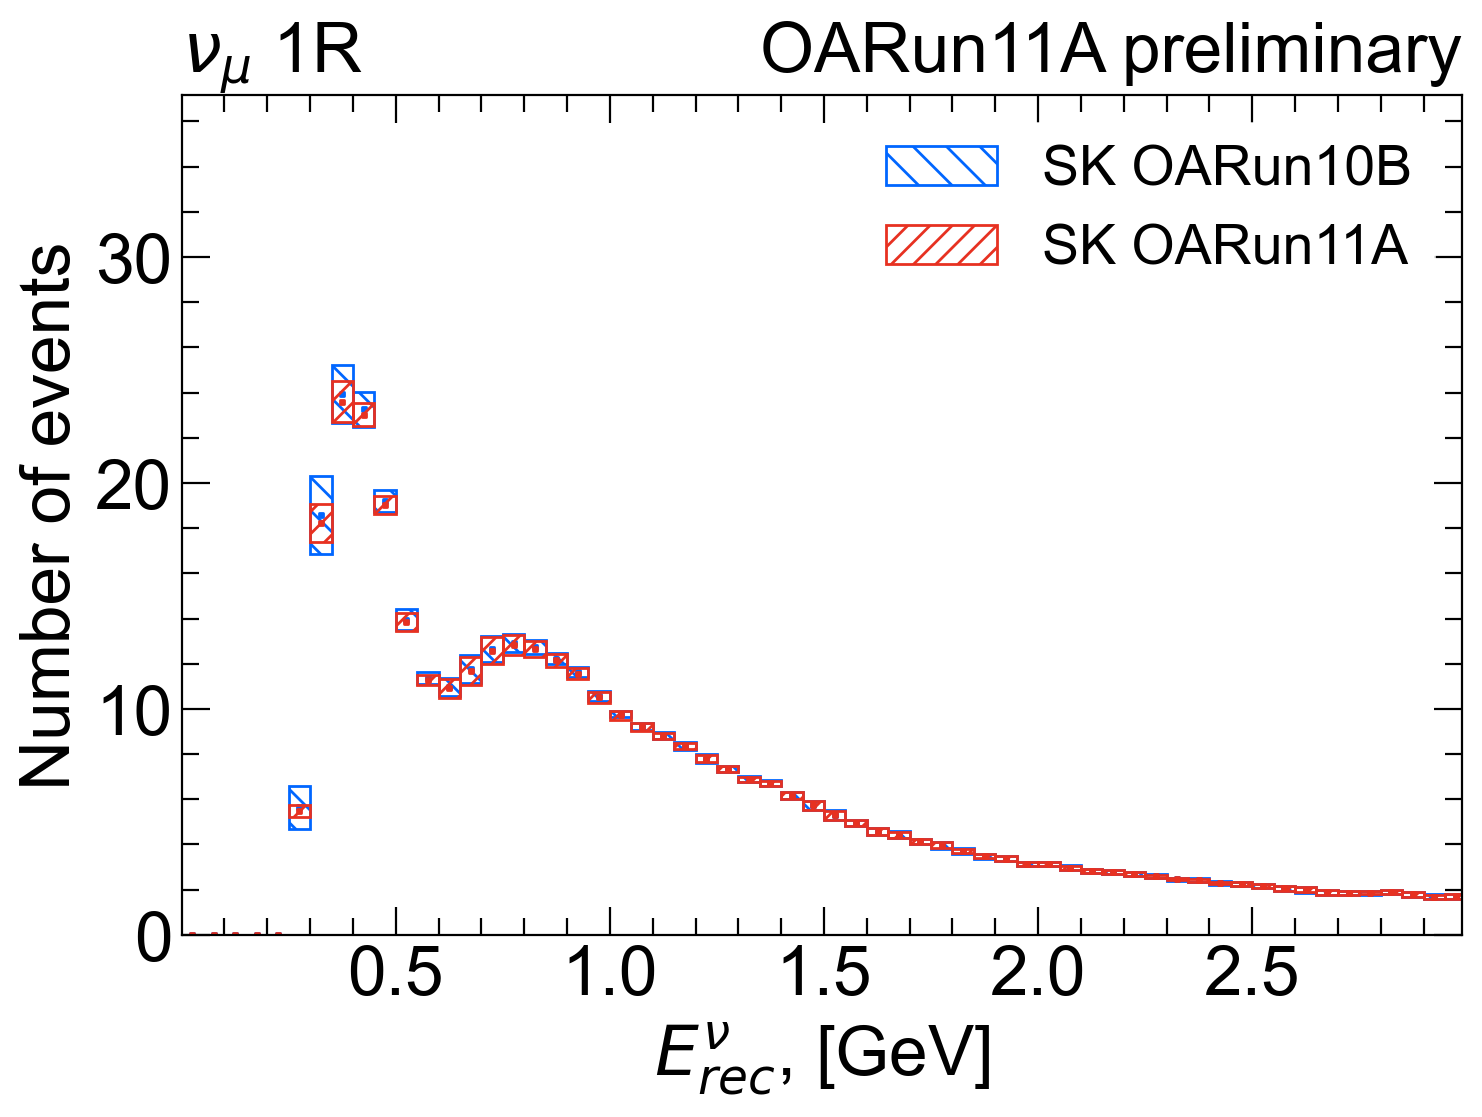

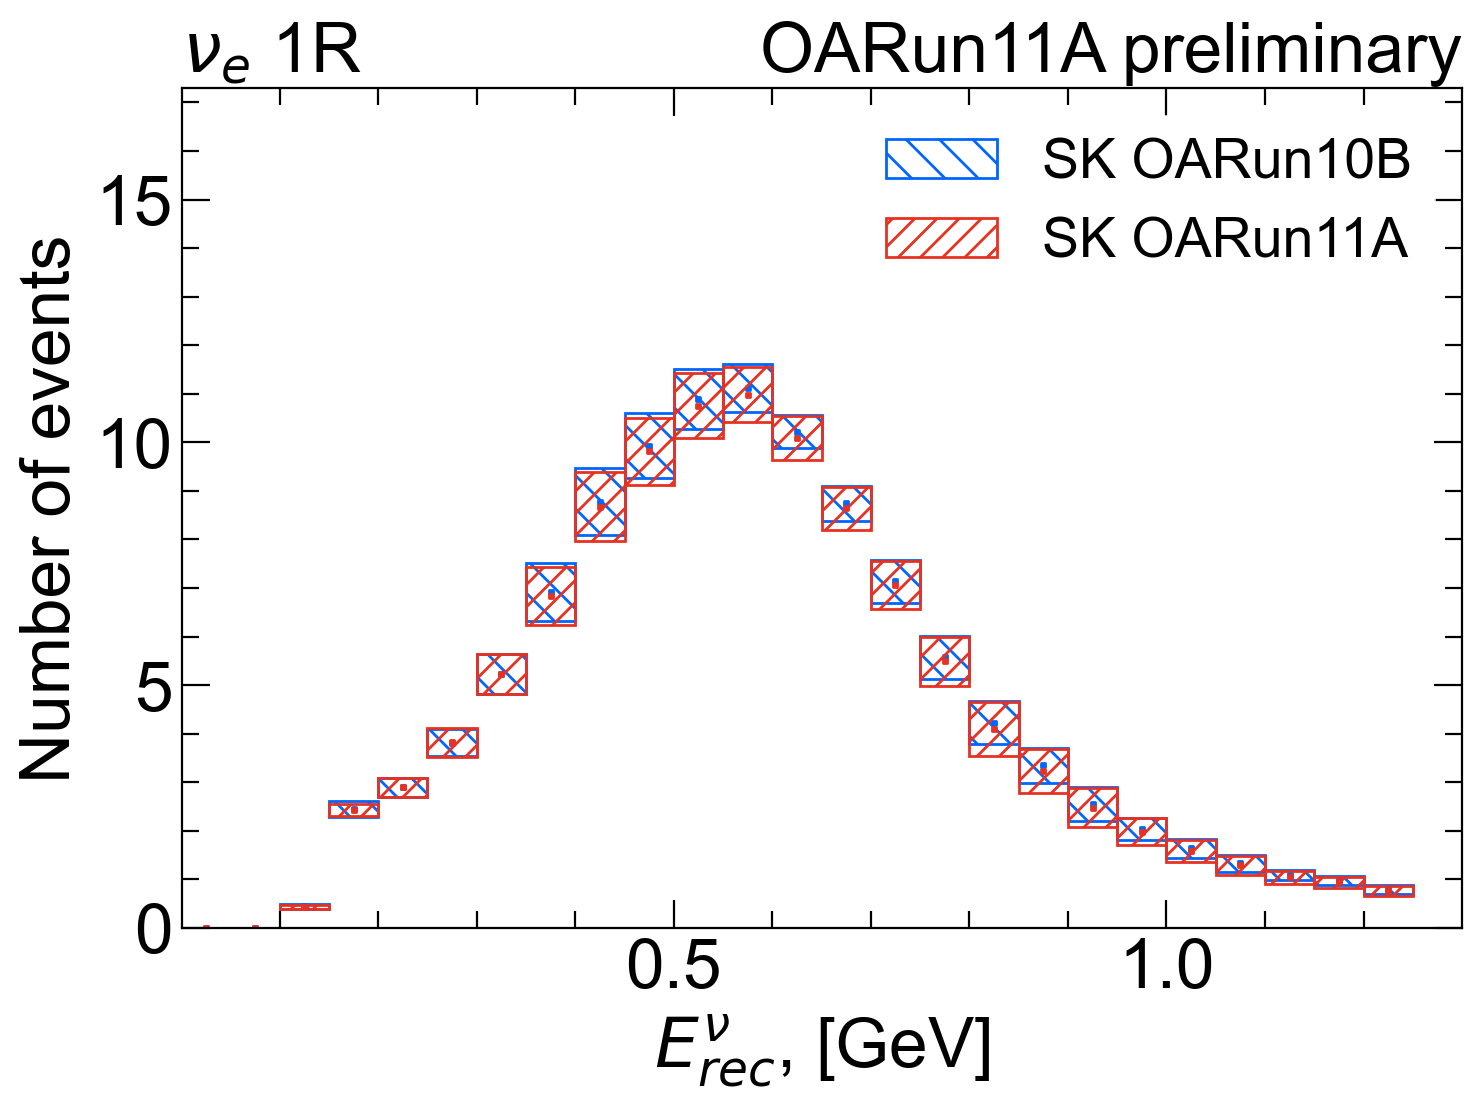

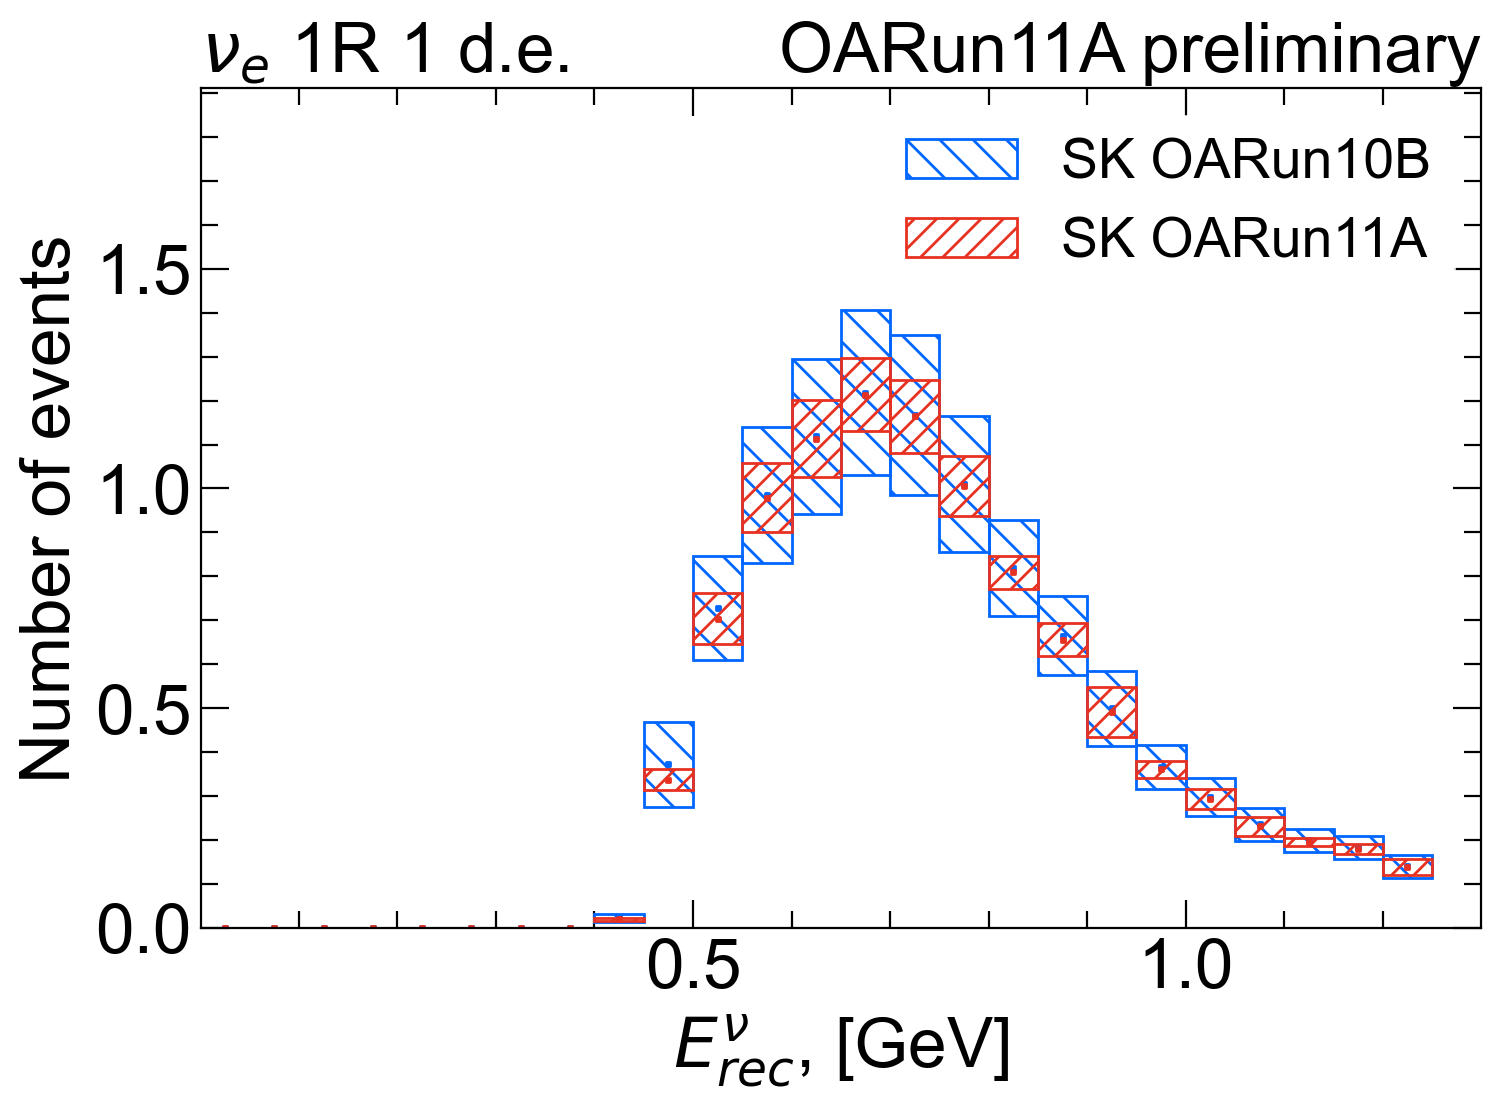

In [6]:
indir_1 = indir_postbanff_SKoa2021
indir_2 = indir_postbanff
labels = ['SK OARun10B', 'SK OARun11A']

PlotErrorBands(indir_1, indir_2, labels, group='sk', nfiles = 100)